In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans as kmeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

# Load Projected Data

In [2]:
# dataset 2 - cover type
X_pca = pd.read_csv("covertype_PCA_transformed_X_54_components.csv", index_col=0, header=None)
X_ica = pd.read_csv("covertype_ICA_transformed_X_54_components_sorted_by_kurtosis.csv", index_col=0, header=None)
X_rp = pd.read_csv("covertype_Randomized Projection_transformed_X_54_components.csv", index_col=0, header=None)
X_fa = pd.read_csv("covertype_Factor Analysis_transformed_X_54_components.csv", index_col=0, header=None)
Y = pd.read_csv("covertype_corresponding_Y.csv", index_col=0, header=None)
Y = Y.T.values[0]

n_clusters=6    # number of clusters for kmeans
n_components=6    #number of clusters for EM
components = [1, 2, 3, 4] + list(range(5, 33, 3))  # list of components to iterate clustering

# Plotting UDF

In [3]:
def plotting(evaluations, components):
    for mname, m in evaluations:
        plt.figure(figsize=(8,5))
        plt.suptitle("%s on Projected Data"%mname)
        handle = []
        for name in m:
            h, = plt.plot(components, m[name])
            handle.append(h)
        plt.xlabel("Number of components")
        plt.legend(handle, list(m.keys()), loc='upper right')

# Perform Clustering

In [4]:
projections = [
    ('PCA', X_pca),
    ('ICA', X_ica),
    ('RP', X_rp),
    ('FA', X_fa)
]

clustering = [
    ('kmeans', kmeans(random_state=0, n_clusters=n_clusters)),
    ('EM', GMM(random_state=5, n_components=n_components, max_iter=50))
]

finish PCA 1 components clustering
finish PCA 2 components clustering
finish PCA 3 components clustering
finish PCA 4 components clustering
finish PCA 5 components clustering
finish PCA 8 components clustering
finish PCA 11 components clustering
finish PCA 14 components clustering
finish PCA 17 components clustering
finish PCA 20 components clustering
finish PCA 23 components clustering
finish PCA 26 components clustering
finish PCA 29 components clustering
finish PCA 32 components clustering
finish ICA 1 components clustering
finish ICA 2 components clustering
finish ICA 3 components clustering
finish ICA 4 components clustering
finish ICA 5 components clustering
finish ICA 8 components clustering
finish ICA 11 components clustering
finish ICA 14 components clustering
finish ICA 17 components clustering
finish ICA 20 components clustering
finish ICA 23 components clustering
finish ICA 26 components clustering
finish ICA 29 components clustering
finish ICA 32 components clustering
fini

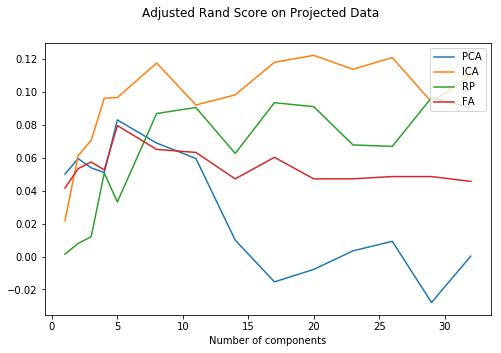

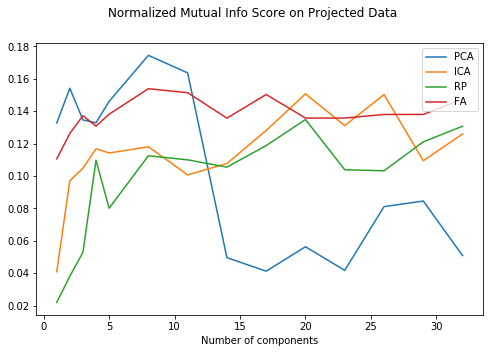

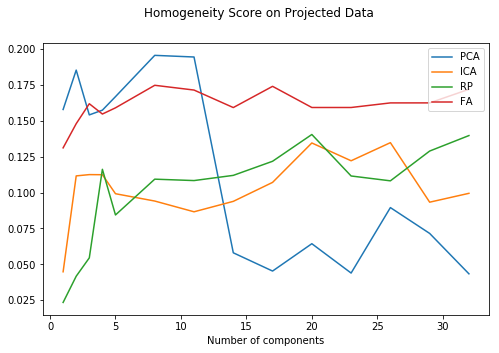

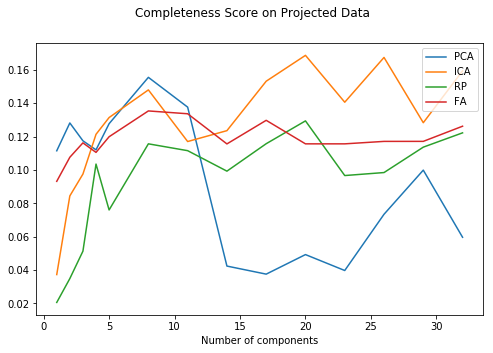

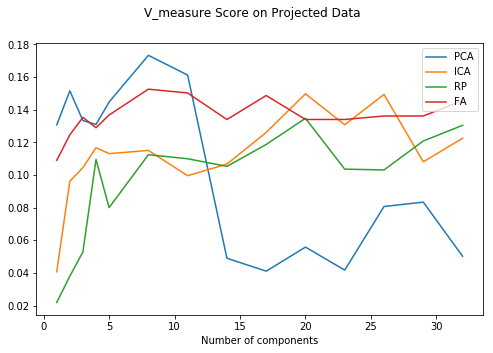

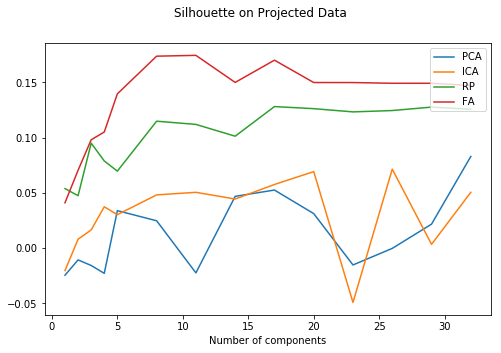

finish PCA 1 components clustering
finish PCA 2 components clustering
finish PCA 3 components clustering
finish PCA 4 components clustering
finish PCA 5 components clustering
finish PCA 8 components clustering
finish PCA 11 components clustering
finish PCA 14 components clustering
finish PCA 17 components clustering
finish PCA 20 components clustering
finish PCA 23 components clustering
finish PCA 26 components clustering
finish PCA 29 components clustering
finish PCA 32 components clustering
finish ICA 1 components clustering
finish ICA 2 components clustering
finish ICA 3 components clustering
finish ICA 4 components clustering
finish ICA 5 components clustering
finish ICA 8 components clustering
finish ICA 11 components clustering
finish ICA 14 components clustering
finish ICA 17 components clustering
finish ICA 20 components clustering
finish ICA 23 components clustering
finish ICA 26 components clustering
finish ICA 29 components clustering
finish ICA 32 components clustering
fini

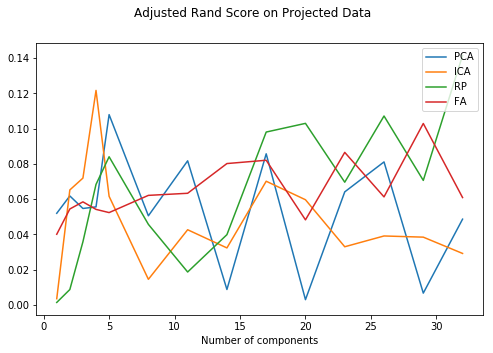

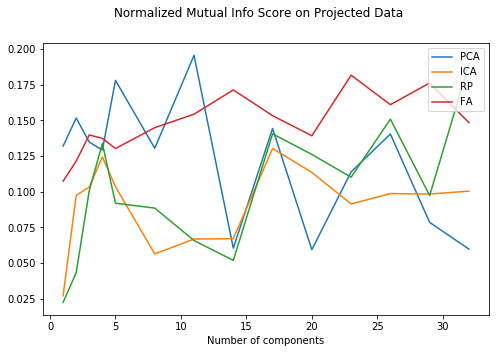

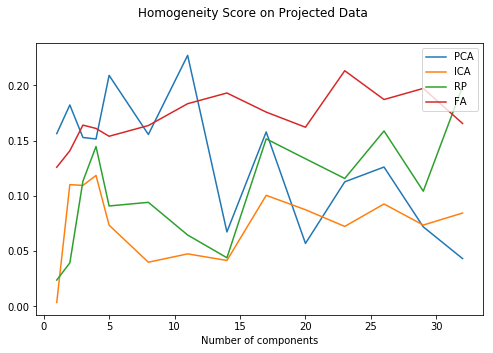

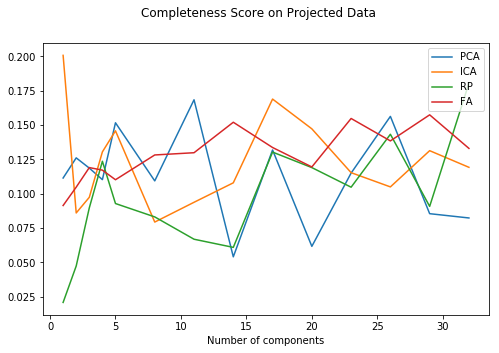

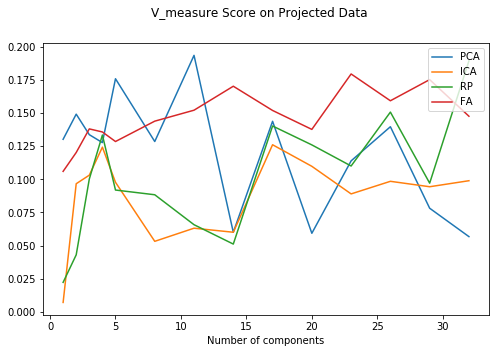

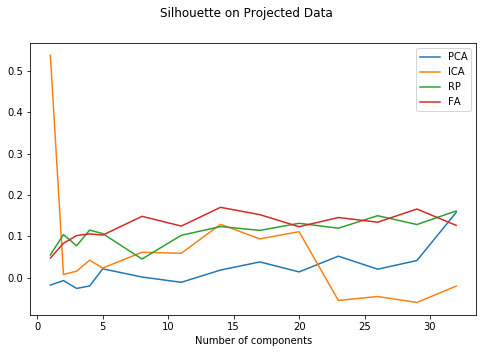

In [5]:
for cname, c in clustering:
    ARI = {}
    NMIS = {}
    AMIS = {}
    homo = {}
    comp = {}
    v_meas = {}
    silhouette = {}

    # perform clustering and collect metrics
    for pname, X in projections:
        ARI[pname] = []
        NMIS[pname] = []
        AMIS[pname] = []
        homo[pname] = []
        comp[pname] = []
        v_meas[pname] = []
        silhouette[pname] = []

        for n in components:
            c.fit(X.iloc[:, :n])
            Y_pred = c.predict(X.iloc[:, :n])
            ARI[pname].append(metrics.adjusted_rand_score(Y, Y_pred))  
            NMIS[pname].append(metrics.normalized_mutual_info_score(Y, Y_pred)) 
            AMIS[pname].append(metrics.adjusted_mutual_info_score(Y, Y_pred)) 
            homo[pname].append(metrics.homogeneity_score(Y, Y_pred)) 
            comp[pname].append(metrics.completeness_score(Y, Y_pred))
            v_meas[pname].append(metrics.v_measure_score(Y, Y_pred))
            silhouette[pname].append(metrics.silhouette_score(X, Y_pred, metric='euclidean'))
            print("finish %s %s components clustering"%(pname, n))

    eval_names = [
        ('Adjusted Rand Score', ARI), 
        ('Normalized Mutual Info Score', NMIS), 
        ('Homogeneity Score', homo), 
        ('Completeness Score',comp),
        ('V_measure Score', v_meas), 
        ('Silhouette', silhouette)
    ]
    plotting(eval_names, components)
    plt.show()